# Dataset

In [1]:
train_test_new <- read.csv("train-test-new.csv")

In [2]:
head(train_test_new)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [3]:
n <- length(train_test_new[,1])
y.class <- rep(0,n)

In [4]:
for (i in 1:n){
    if (train_test_new[i, 20] == "yes"){
        y.class[i] <- 1
    }
}

In [5]:
train_test_all <- cbind(train_test_new[,1:19], y.class)
head(train_test_all)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [6]:
train <- train_test_all[1:7500,]
test <- train_test_all[7501:10000,]

In [7]:
head(train)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


# Logistic Regression

In [31]:
result.LR1 <- glm(y.class~., data=train, family=binomial)

In [32]:
summary(result.LR1)


Call:
glm(formula = y.class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0651  -0.3934  -0.3185  -0.2565   2.8422  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.528e+02  7.968e+01  -1.917 0.055233 .  
age                          -6.505e-03  4.932e-03  -1.319 0.187193    
jobblue-collar                5.451e-02  1.651e-01   0.330 0.741259    
jobentrepreneur               2.549e-01  2.384e-01   1.069 0.284883    
jobhousemaid                  3.099e-01  2.753e-01   1.126 0.260274    
jobmanagement                 1.883e-01  1.779e-01   1.058 0.289858    
jobretired                    5.812e-01  2.189e-01   2.655 0.007941 ** 
jobself-employed             -3.015e-01  2.787e-01  -1.082 0.279333    
jobservices                  -1.910e-02  1.774e-01  -0.108 0.914231    
jobstudent                    6.572e-02  2.

In [33]:
# Use the model to predict y on the test set
result.LR2<-predict(result.LR1,newdata=test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [13]:
install.packages("ROCR")

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jean-\AppData\Local\Temp\Rtmp4cLsAA\downloaded_packages


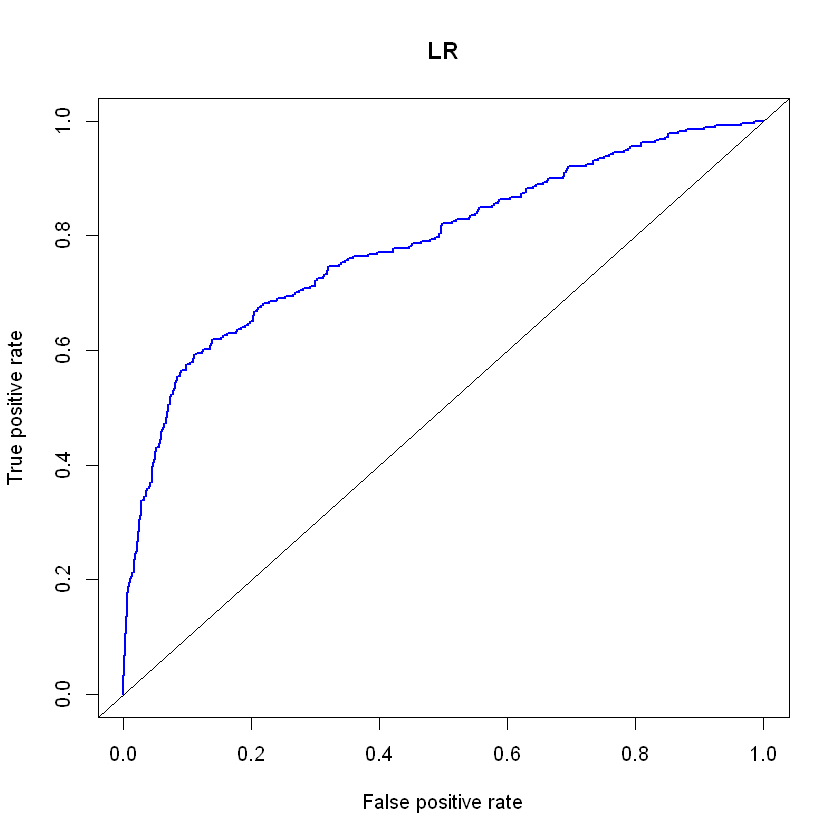

In [34]:
library("ROCR")
fit.LR.pred <-prediction( result.LR2, test[,20])
fit.LR.perf <- performance(fit.LR.pred,"tpr","fpr")
plot( fit.LR.perf,lwd=2,col="blue", main="LR")
abline(a=0,b=1)

In [35]:
auc.LR.tmp <- performance(fit.LR.pred, "auc")
auc.LR <- as.numeric(auc.LR.tmp@y.values)
auc.LR

[1] 0.787506

# Random Forest

In [19]:
head(train)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [20]:
library("randomForest")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [21]:
rf <- randomForest(y.class~., data=train, type = 'classification', importance=TRUE)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [23]:
print(rf)


Call:
 randomForest(formula = y.class ~ ., data = train, type = "classification",      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 0.08095918
                    % Var explained: 16.95


In [24]:
result.RF <- predict(rf, newdata=test, type="response")

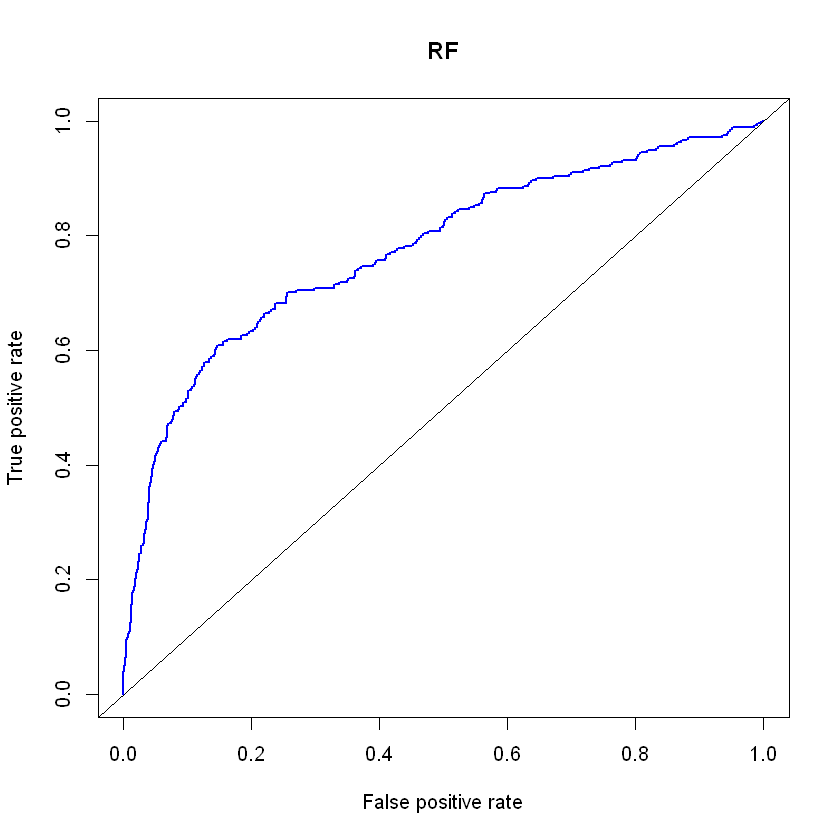

In [25]:
library("ROCR")
fit.RF.pred <-prediction( result.RF, test[,20])
fit.RF.perf <- performance(fit.RF.pred,"tpr","fpr")
plot( fit.RF.perf,lwd=2,col="blue", main="RF")
abline(a=0,b=1)

In [26]:
auc.RF.tmp <- performance(fit.RF.pred, "auc")
auc.RF <- as.numeric(auc.RF.tmp@y.values)
auc.RF

[1] 0.7762619

# SVM

In [27]:
library(e1071)
library(kernlab)

ERROR: Error in library(e1071): there is no package called 'e1071'


In [ ]:
svmfit <- svm(y.class~., data = train, kernel = "polynomial", cost = 10)

In [ ]:
result.SVM <- predict(svmfit, newdata=test, type="response")

In [ ]:
library("ROCR")
fit.SVM.pred <-prediction( result.SVM, test[,20])
fit.SVM.perf <- performance(fit.SVM.pred,"tpr","fpr")
plot( fit.SVM.perf,lwd=2,col="blue", main="SVM")
abline(a=0,b=1)

In [ ]:
auc.SVM.tmp <- performance(fit.SVM.pred, "auc")
auc.SVM <- as.numeric(auc.SVM.tmp@y.values)
auc.SVM

# DL

In [5]:
col_list <- paste(c(colnames(train_test_all[1:20])), collapse="+")
col_list <- paste(c("~", col_list), collapse="")
f <- formula(col_list)
df <- train_test_all

## Replace "-" by "_" 
levels(df$job)<-c('admin.','blue_collar','entrepreneur','housemaid','management','retired','self_employed','services','student','technician','unemployed','unknown')
matrix = model.matrix(f, data=df)
len_matrix = dim(matrix)
col_list_matrix <- paste(colnames(matrix[,3:len_matrix[2]-1]), collapse="+")
col_list_matrix <- paste(c("y.class~", col_list_matrix), collapse="")
f_matrix <- formula(col_list_matrix)

In [8]:
dim(matrix)

[1] 10000    54

In [9]:
# normalization
full_df <- as.data.frame(matrix[,3:len_matrix[2]-1])
full_df_norm <- scale(full_df)
full_df_norm = cbind(full_df_norm, matrix[,len_matrix[2]])
colnames(full_df_norm)[len_matrix[2]-1] <- 'y.class'
train_df <- full_df_norm[1:8000,]
test_df <- full_df_norm[8001:10000,]

In [12]:
install.packages('neuralnet')

also installing the dependency 'Deriv'



package 'Deriv' successfully unpacked and MD5 sums checked
package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vstef\AppData\Local\Temp\RtmpKwBg6C\downloaded_packages


In [13]:
require(neuralnet)
nn = neuralnet::neuralnet(f_matrix, data = train_df, hidden=c(32), act.fct = "logistic", linear.output = FALSE)
plot(nn)

Loading required package: neuralnet
Warning message:
"package 'neuralnet' was built under R version 3.6.3"

In [14]:
predict = neuralnet::compute(nn, test_df)
results <- data.frame(real = test_df[,len_matrix[2]-1], prediction = predict$net.result)

Warning message:
"package 'ROCR' was built under R version 3.6.3"
Attaching package: 'ROCR'

The following object is masked from 'package:neuralnet':

    prediction



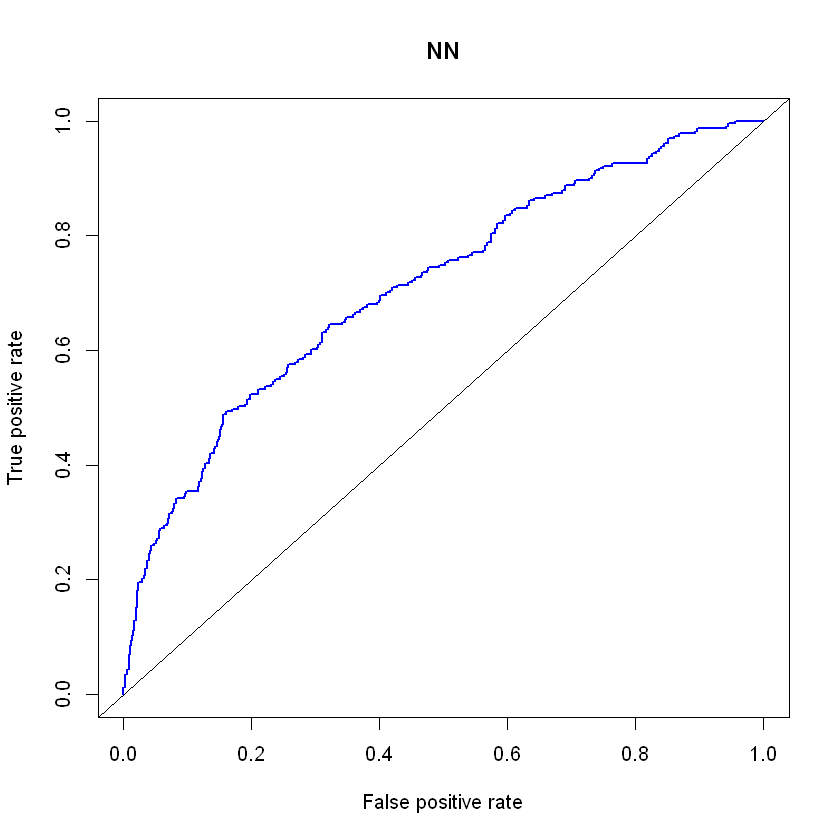

In [15]:
library("ROCR")
fit.NN.pred <- ROCR::prediction( predict$net.result, test_df[,len_matrix[2]-1])
fit.NN.perf <- performance(fit.NN.pred,"tpr","fpr")
plot( fit.NN.perf,lwd=2,col="blue", main="NN")
abline(a=0,b=1)

In [16]:
fit.NN.auc <- performance(fit.NN.pred, "auc")
fit.NN.auc <- fit.NN.auc@y.values[[1]]
fit.NN.auc

[1] 0.7130524

# Best Model

In [7]:
result.LR1 <- glm(y.class~., data=train, family=binomial)

In [8]:
result.LR2<-predict(result.LR1,newdata=test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [9]:
library("ROCR")
fit.LR.pred <-prediction( result.LR2, test[,20])
fit.LR.perf <- performance(fit.LR.pred,"f")

Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [10]:
str(fit.LR.perf)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "Cutoff"
  ..@ y.name      : chr "Precision-Recall F measure"
  ..@ alpha.name  : chr "none"
  ..@ x.values    :List of 1
  .. ..$ : Named num [1:2491] Inf 0.949 0.901 0.873 0.871 ...
  .. .. ..- attr(*, "names")= chr [1:2491] "" "8638" "7810" "8566" ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:2491] NaN 0.00683 0.01361 0.02034 0.02703 ...
  ..@ alpha.values: list()


In [11]:
cutoffs <- data.frame(cut=fit.LR.perf@x.values[[1]], f1=fit.LR.perf@y.values[[1]])

In [13]:
cutoffs[which.max(cutoffs$f1), ]

,cut,f1
9498,0.2062728,0.507837


In [14]:
cut = cutoffs[which.max(cutoffs$f1), 1]

In [15]:
cut

[1] 0.2062728

In [16]:
str(fit.LR.pred)

Formal class 'prediction' [package "ROCR"] with 11 slots
  ..@ predictions:List of 1
  .. ..$ : Named num [1:2500] 0.0397 0.033 0.0253 0.0679 0.0343 ...
  .. .. ..- attr(*, "names")= chr [1:2500] "7501" "7502" "7503" "7504" ...
  ..@ labels     :List of 1
  .. ..$ : Ord.factor w/ 2 levels "0"<"1": 1 1 1 1 1 2 1 1 2 1 ...
  ..@ cutoffs    :List of 1
  .. ..$ : Named num [1:2491] Inf 0.949 0.901 0.873 0.871 ...
  .. .. ..- attr(*, "names")= chr [1:2491] "" "8638" "7810" "8566" ...
  ..@ fp         :List of 1
  .. ..$ : num [1:2491] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ tp         :List of 1
  .. ..$ : num [1:2491] 0 1 2 3 4 5 6 7 8 9 ...
  ..@ tn         :List of 1
  .. ..$ : num [1:2491] 2208 2208 2208 2208 2208 ...
  ..@ fn         :List of 1
  .. ..$ : num [1:2491] 292 291 290 289 288 287 286 285 284 283 ...
  ..@ n.pos      :List of 1
  .. ..$ : int 292
  ..@ n.neg      :List of 1
  .. ..$ : int 2208
  ..@ n.pos.pred :List of 1
  .. ..$ : num [1:2491] 0 1 2 3 4 5 6 7 8 9 ...
  ..@ n.neg.pred

In [17]:
n <- length(test[,20])
y.pred <- rep(0,n)

In [18]:
n

[1] 2500

In [19]:
for (i in 1:n){
    if (result.LR2[i] >= cut){
        y.pred[i] <- 1
    }
}

In [20]:
length(y.pred)

[1] 2500

In [21]:
TP = 0
FP = 0
TN = 0
FN = 0

for (i in 1:n){
    if(test[i,20]==1 & y.pred[i] == 1){TP = TP + 1}
    else if(test[i,20]==1 & y.pred[i] == 0){FN = FN + 1}
    else if (test[i,20]==0 & y.pred[i] == 0){TN = TN + 1}
    else if (test[i,20]==0 & y.pred[i] == 1){FP = FP + 1}
}

In [22]:
TP

[1] 162

In [23]:
FP

[1] 184

In [24]:
TN

[1] 2024

In [25]:
FN

[1] 130

# Submission

In [7]:
result.LR <- glm(y.class~., data=train, family=binomial)

In [8]:
summary(result.LR)


Call:
glm(formula = y.class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0651  -0.3934  -0.3185  -0.2565   2.8422  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.528e+02  7.968e+01  -1.917 0.055233 .  
age                          -6.505e-03  4.932e-03  -1.319 0.187193    
jobblue-collar                5.451e-02  1.651e-01   0.330 0.741259    
jobentrepreneur               2.549e-01  2.384e-01   1.069 0.284883    
jobhousemaid                  3.099e-01  2.753e-01   1.126 0.260274    
jobmanagement                 1.883e-01  1.779e-01   1.058 0.289858    
jobretired                    5.812e-01  2.189e-01   2.655 0.007941 ** 
jobself-employed             -3.015e-01  2.787e-01  -1.082 0.279333    
jobservices                  -1.910e-02  1.774e-01  -0.108 0.914231    
jobstudent                    6.572e-02  2.

In [9]:
submit <- read.csv("submit.csv")

In [10]:
head(submit)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y..yes.or.no.,probability.of.yes..or.score.
44,services,married,high.school,no,yes,no,telephone,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,NA,NA
38,technician,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NA,NA
23,student,single,high.school,no,no,yes,cellular,sep,thu,...,3,2,success,-1.1,94.199,-37.5,0.878,4963.6,NA,NA
57,self-employed,married,basic.4y,no,yes,no,cellular,apr,mon,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,NA,NA
66,retired,married,basic.4y,no,yes,no,cellular,apr,wed,...,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,NA,NA
42,management,married,basic.6y,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,NA,NA


In [11]:
length(submit)

[1] 21

In [12]:
probability <-predict(result.LR,newdata=submit[,1:19], type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [13]:
head(probability)

1          2          3          4          5          6 
0.03755101 0.02513824 0.71080095 0.10168988 0.27666326 0.02365230

In [16]:
n = length(submit[,19])
cut = 0.206272836493452

In [18]:
class = rep(0,n)
for (i in 1:n){
    if (probability[i]>=cut){
        class[i] <- 1
    }
}

In [19]:
length(probability)

[1] 1000

In [20]:
length(class)

[1] 1000

In [22]:
results <- data.frame(probability, class)
head(results)

probability,class
0.03755101,0
0.02513824,0
0.71080095,1
0.10168988,0
0.27666326,1
0.02365230,0


In [23]:
write.csv(results, "results.csv")